In [277]:
from textblob import TextBlob
from sklearn import model_selection, preprocessing, linear_model, naive_bayes, metrics
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn import decomposition, ensemble
import nltk
from nltk.corpus import stopwords
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.metrics import precision_score, recall_score
import pandas, xgboost, numpy, textblob, string
from keras.preprocessing import text, sequence
from keras import layers, models, optimizers
from sklearn.metrics import precision_score, recall_score, confusion_matrix, accuracy_score
from sklearn.metrics import classification_report, f1_score,roc_auc_score,cohen_kappa_score

In [205]:
import pandas as pd
data = pd.read_csv("vaccination_tweets.csv")

In [206]:
data.head()

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet
0,1340539111971516416,Rachel Roh,"La Crescenta-Montrose, CA",Aggregator of Asian American news; scanning di...,2009-04-08 17:52:46,405,1692,3247,False,2020-12-20 06:06:44,Same folks said daikon paste could treat a cyt...,['PfizerBioNTech'],Twitter for Android,0,0,False
1,1338158543359250433,Albert Fong,"San Francisco, CA","Marketing dude, tech geek, heavy metal & '80s ...",2009-09-21 15:27:30,834,666,178,False,2020-12-13 16:27:13,While the world has been on the wrong side of ...,NaN,Twitter Web App,1,1,False
2,1337858199140118533,eli🇱🇹🇪🇺👌,Your Bed,"heil, hydra 🖐☺",2020-06-25 23:30:28,10,88,155,False,2020-12-12 20:33:45,#coronavirus #SputnikV #AstraZeneca #PfizerBio...,"['coronavirus', 'SputnikV', 'AstraZeneca', 'Pf...",Twitter for Android,0,0,False
3,1337855739918835717,Charles Adler,"Vancouver, BC - Canada","Hosting ""CharlesAdlerTonight"" Global News Radi...",2008-09-10 11:28:53,49165,3933,21853,True,2020-12-12 20:23:59,"Facts are immutable, Senator, even when you're...",NaN,Twitter Web App,446,2129,False
4,1337854064604966912,Citizen News Channel,NaN,Citizen News Channel bringing you an alternati...,2020-04-23 17:58:42,152,580,1473,False,2020-12-12 20:17:19,Explain to me again why we need a vaccine @Bor...,"['whereareallthesickpeople', 'PfizerBioNTech']",Twitter for iPhone,0,0,False


In [207]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1518 entries, 0 to 1517
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                1518 non-null   int64 
 1   user_name         1518 non-null   object
 2   user_location     1200 non-null   object
 3   user_description  1442 non-null   object
 4   user_created      1518 non-null   object
 5   user_followers    1518 non-null   int64 
 6   user_friends      1518 non-null   int64 
 7   user_favourites   1518 non-null   int64 
 8   user_verified     1518 non-null   bool  
 9   date              1518 non-null   object
 10  text              1518 non-null   object
 11  hashtags          1131 non-null   object
 12  source            1518 non-null   object
 13  retweets          1518 non-null   int64 
 14  favorites         1518 non-null   int64 
 15  is_retweet        1518 non-null   bool  
dtypes: bool(2), int64(6), object(8)
memory usage: 169.1+ KB


In [208]:
df = pd.DataFrame()
df["text"] = data["text"]
df["label"] = data["user_verified"]

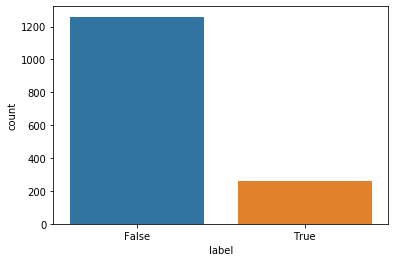

In [209]:
sns.countplot(df["label"])

In [210]:
df.head()

,text,label
0,Same folks said daikon paste could treat a cyt...,False
1,While the world has been on the wrong side of ...,False
2,#coronavirus #SputnikV #AstraZeneca #PfizerBio...,False
3,"Facts are immutable, Senator, even when you're...",True
4,Explain to me again why we need a vaccine @Bor...,False


In [211]:
df_label = df.groupby("label")

In [212]:
df_true = df_label.get_group(True)

In [213]:
df_true.tail()

,text,label
1462,#UPDATE The EU is set to start Covid-19 inocul...,True
1464,#New: Airlines Say Early Vaccine Transports Ar...,True
1489,US COVID-19 Vaccination Programme: Health Work...,True
1494,Safety Questions on Pfizer Vaccine Raised Afte...,True
1517,An Alaskan health worker suffered a serious al...,True


In [214]:
df_true.count()

text     258
label    258
dtype: int64

In [215]:
df.count()

text     1518
label    1518
dtype: int64

In [216]:
df_true1 = df_true
df_true2 = df_true
df_true3 = df_true

In [217]:
new_df = pd.concat([df,df_true,df_true1,df_true2,df_true3])

In [218]:
new_df.count()

text     2550
label    2550
dtype: int64

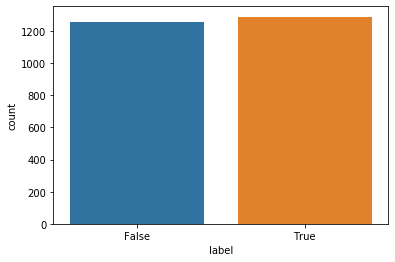

In [219]:
sns.countplot(new_df["label"])

In [220]:
new_df["number_of_letters"] = new_df["text"].str.len()

In [221]:
new_df["number_of_sentences"] = new_df["text"].apply(lambda x: len(str(x).split(" ")))

In [222]:
new_df["text"].apply(lambda x: len([x for x in x.split() if x.startswith("adventure")]))
new_df["number_of_special_character"] = new_df["text"].apply(lambda x: len([x for x in x.split() if x.startswith("adventure")]))

In [223]:
new_df["text"].apply(lambda x: len([x for x in x.split() if x.isdigit()]))
new_df["number_of_numbers"] = df["text"].apply(lambda x: len([x for x in x.split() if x.isdigit()]))

In [224]:
new_df.head()

,text,label,number_of_letters,number_of_sentences,number_of_special_character,number_of_numbers
0,Same folks said daikon paste could treat a cyt...,False,97,12,0,0
1,While the world has been on the wrong side of ...,False,140,21,0,0
2,#coronavirus #SputnikV #AstraZeneca #PfizerBio...,False,140,15,0,0
3,"Facts are immutable, Senator, even when you're...",True,140,20,0,0
4,Explain to me again why we need a vaccine @Bor...,False,135,14,0,0


In [225]:
# uppercase, lowercase conversion
new_df["text"] = new_df["text"].apply(lambda x: " ".join(x.lower() for x in x.split()))
# punctuation marks
new_df["text"] = new_df["text"].str.replace("[^\w\s]","")
# numbers
new_df["text"] = new_df["text"].str.replace("\d","")

In [226]:
new_df.head()

,text,label,number_of_letters,number_of_sentences,number_of_special_character,number_of_numbers
0,same folks said daikon paste could treat a cyt...,False,97,12,0,0
1,while the world has been on the wrong side of ...,False,140,21,0,0
2,coronavirus sputnikv astrazeneca pfizerbiontec...,False,140,15,0,0
3,facts are immutable senator even when youre no...,True,140,20,0,0
4,explain to me again why we need a vaccine bori...,False,135,14,0,0


In [227]:
# stop words

In [228]:
#stopwords
nltk.download('stopwords')
sw = stopwords.words('english')
new_df['text'] = new_df['text'].apply(lambda x: " ".join(x for x in x.split() if x not in sw))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\frkyz\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [229]:
new_df.head()

,text,label,number_of_letters,number_of_sentences,number_of_special_character,number_of_numbers
0,folks said daikon paste could treat cytokine s...,False,97,12,0,0
1,world wrong side history year hopefully bigges...,False,140,21,0,0
2,coronavirus sputnikv astrazeneca pfizerbiontec...,False,140,15,0,0
3,facts immutable senator even youre ethically s...,True,140,20,0,0
4,explain need vaccine borisjohnson matthancock ...,False,135,14,0,0


In [230]:
# deletion of sparse words
delete = pd.Series(' '.join(data['text']).split()).value_counts()[-1000:]
new_df['text'] =new_df['text'].apply(lambda x: " ".join(x for x in x.split() if x not in delete))

In [231]:
new_df.head()

,text,label,number_of_letters,number_of_sentences,number_of_special_character,number_of_numbers
0,folks said daikon paste could treat cytokine s...,False,97,12,0,0
1,world wrong side history year hopefully bigges...,False,140,21,0,0
2,coronavirus sputnikv astrazeneca pfizerbiontec...,False,140,15,0,0
3,facts immutable senator even youre ethically s...,True,140,20,0,0
4,explain need vaccine borisjohnson matthancock ...,False,135,14,0,0


In [232]:
# lemmatization
from textblob import Word
#nltk.download('wordnet')
new_df['text'] = new_df['text'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()])) 

In [233]:
new_df.head()

,text,label,number_of_letters,number_of_sentences,number_of_special_character,number_of_numbers
0,folk said daikon paste could treat cytokine st...,False,97,12,0,0
1,world wrong side history year hopefully bigges...,False,140,21,0,0
2,coronavirus sputnikv astrazeneca pfizerbiontec...,False,140,15,0,0
3,fact immutable senator even youre ethically st...,True,140,20,0,0
4,explain need vaccine borisjohnson matthancock ...,False,135,14,0,0


In [234]:
# test - train

In [235]:
X = new_df["text"]
Y = new_df["label"]

In [236]:
x_train, x_test, y_train, y_test = model_selection.train_test_split(X,Y, random_state = 42)

In [237]:
encoder = preprocessing.LabelEncoder()

In [238]:
y_train = encoder.fit_transform(y_train)
y_test = encoder.fit_transform(y_test)

In [241]:
vecto = CountVectorizer()
vecto.fit(x_train)

CountVectorizer()

In [242]:
x_train_count = vecto.transform(x_train)
x_test_count = vecto.transform(x_test)

In [243]:
vecto.get_feature_names()[0:5]

['_scgp_', 'ab', 'abc', 'abcnews', 'abcworldnews']

In [244]:
x_train_count.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [245]:
# TF-IDF
# word level

In [246]:
tf_ıdf_vecto = TfidfVectorizer()
tf_ıdf_vecto.fit(x_train)

TfidfVectorizer()

In [247]:
x_train_tfıdf = tf_ıdf_vecto.transform(x_train)
x_test_tfıdf = tf_ıdf_vecto.transform(x_test)

In [248]:
tf_ıdf_vecto.get_feature_names()[0:5]

['_scgp_', 'ab', 'abc', 'abcnews', 'abcworldnews']

In [249]:
# ngram level tf-ıdf

In [250]:
tf_ıdf_ngram = TfidfVectorizer(ngram_range = (2,3))
tf_ıdf_ngram.fit(x_train)

TfidfVectorizer(ngram_range=(2, 3))

In [251]:
x_train_tfıdf_ngram = tf_ıdf_ngram.transform(x_train)
x_test_tfıdf_ngram = tf_ıdf_ngram.transform(x_test)

In [252]:
# charactes level ft-ıdf

In [253]:
tf_ıdf_ngram_char = TfidfVectorizer(analyzer = "char",ngram_range = (2,3))
tf_ıdf_ngram_char.fit(x_train)

TfidfVectorizer(analyzer='char', ngram_range=(2, 3))

In [254]:
x_train_ngram_char = tf_ıdf_ngram_char.transform(x_train)
x_test_ngram_char = tf_ıdf_ngram_char.transform(x_test)

In [255]:
# machine learning

In [256]:
# lojistik regression

In [257]:
loj = linear_model.LogisticRegression()
loj_model = loj.fit(x_train_count, y_train)
accuracy = model_selection.cross_val_score(loj_model, x_test_count, y_test, cv = 10).mean()
print("Count Vectors Accuracy Score: ",accuracy)
y_pred = loj.predict(x_test_count)
recall = recall_score(y_test, y_pred)
print("recall score ",recall)

Count Vectors Accuracy Score:  0.8133928571428571
recall score  1.0


In [258]:
loj = linear_model.LogisticRegression()
loj_model = loj.fit(x_train_tfıdf, y_train)
accuracy = model_selection.cross_val_score(loj_model, x_test_tfıdf, y_test, cv = 10).mean()
print("Word-Level TF-IDF Accuracy Score: ",accuracy)
y_pred = loj.predict(x_test_tfıdf)
recall = recall_score(y_test, y_pred)
print("recall score ",recall)

Word-Level TF-IDF Accuracy Score:  0.7867559523809524
recall score  1.0


In [259]:
loj = linear_model.LogisticRegression()
loj_model = loj.fit(x_train_tfıdf_ngram, y_train)
accuracy = model_selection.cross_val_score(loj_model, x_test_tfıdf_ngram, y_test, cv = 10).mean()
print("N-Gram TF-IDF Accuracy Score: ",accuracy)
y_pred = loj.predict(x_test_tfıdf_ngram)
recall = recall_score(y_test, y_pred)
print("recall score ",recall)

N-Gram TF-IDF Accuracy Score:  0.8073164682539684
recall score  0.9905660377358491


In [260]:
loj = linear_model.LogisticRegression()
loj_model = loj.fit(x_train_ngram_char, y_train)
accuracy = model_selection.cross_val_score(loj_model, x_test_ngram_char, y_test, cv = 10).mean()
print("Char Level Accuracy Score: ",accuracy)
y_pred = loj.predict(x_test_ngram_char)
recall = recall_score(y_test, y_pred)
print("recall score ",recall)

Char Level Accuracy Score:  0.7993799603174603
recall score  0.9371069182389937


# navie bayes

In [261]:
nb = naive_bayes.MultinomialNB()
nb_model = nb.fit(x_train_tfıdf, y_train)
accuracy = model_selection.cross_val_score(nb_model, 
                                           x_test_tfıdf, 
                                           y_test, 
                                           cv = 10).mean()
y_pred = nb.predict(x_test_count)
recall = recall_score(y_test, y_pred)
print("recall score ",recall)

print("Word-Level TF-IDF Accuracy Score:", accuracy)

recall score  1.0
Word-Level TF-IDF Accuracy Score: 0.7758432539682539


In [262]:
nb = naive_bayes.MultinomialNB()
nb_model = nb.fit(x_train_count, y_train)
accuracy = model_selection.cross_val_score(nb_model, 
                                           x_test_count, 
                                           y_test, 
                                           cv = 10).mean()
y_pred = nb.predict(x_test_count)
recall = recall_score(y_test, y_pred)
print("recall score ",recall)
print("Count Vectors Doğruluk Oranı:", accuracy)

recall score  0.9905660377358491
Count Vectors Doğruluk Oranı: 0.7679563492063493


In [263]:
nb = naive_bayes.MultinomialNB()
nb_model = nb.fit(x_train_tfıdf_ngram, y_train)
accuracy = model_selection.cross_val_score(nb_model, 
                                           x_test_tfıdf_ngram, 
                                           y_test, 
                                           cv = 10).mean()
y_pred = nb.predict(x_test_tfıdf_ngram)
recall = recall_score(y_test, y_pred)
print("recall score ",recall)
print("N-Gram Accuracy Score", accuracy)

recall score  1.0
N-Gram Accuracy Score 0.7900297619047618


In [264]:
nb = naive_bayes.MultinomialNB()
nb_model = nb.fit(x_train_ngram_char, y_train)
accuracy = model_selection.cross_val_score(nb_model, 
                                           x_test_ngram_char, 
                                           y_test, 
                                           cv = 10).mean()
y_pred = nb.predict(x_test_ngram_char)
recall = recall_score(y_test, y_pred)
print("recall score ",recall)
print("Char Level Accuracy Score", accuracy)

recall score  0.9937106918238994
Char Level Accuracy Score 0.785218253968254


# random forest

In [265]:
rf = ensemble.RandomForestClassifier()
rf_model = rf.fit(x_train_count,y_train)
accuracy = model_selection.cross_val_score(rf_model, 
                                           x_test_count, 
                                           y_test, 
                                           cv = 10).mean()
y_pred = rf.predict(x_test_count)
recall = recall_score(y_test, y_pred)
print("recall score ",recall)
print("Count Vectors Accuracy Score:", accuracy)

recall score  1.0
Count Vectors Accuracy Score: 0.8431547619047619


In [279]:
# The Best
rf = ensemble.RandomForestClassifier()
rf_model = rf.fit(x_train_tfıdf,y_train)
accuracy = model_selection.cross_val_score(rf_model, 
                                           x_test_tfıdf, 
                                           y_test, 
                                           cv = 10).mean()
y_pred = rf.predict(x_test_tfıdf)
recall = recall_score(y_test, y_pred)
print("recall score ",recall)
print("Word level TF-IDF Accuracy Score:", accuracy)

recall score  1.0
Word level TF-IDF Accuracy Score: 0.8856646825396826


test


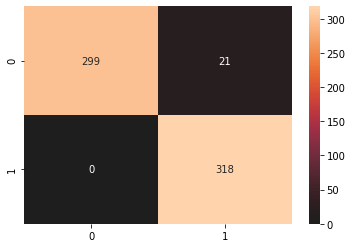

In [280]:
cm=confusion_matrix(y_test, y_pred)
sns.heatmap(cm,center=True,annot=True,fmt='d')
print('test')

In [281]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.93      0.97       320
           1       0.94      1.00      0.97       318

    accuracy                           0.97       638
   macro avg       0.97      0.97      0.97       638
weighted avg       0.97      0.97      0.97       638



In [267]:
rf = ensemble.RandomForestClassifier()
rf_model = rf.fit(x_train_tfıdf_ngram,y_train)
accuracy = model_selection.cross_val_score(rf_model, 
                                           x_test_tfıdf_ngram, 
                                           y_test, 
                                           cv = 10).mean()
y_pred = rf.predict(x_test_tfıdf_ngram)
recall = recall_score(y_test, y_pred)
print("recall score ",recall)
print("N-Gram Level Accuracy Score:", accuracy)

recall score  1.0
N-Gram Level Accuracy Score: 0.8432787698412699


In [268]:
rf = ensemble.RandomForestClassifier()
rf_model = rf.fit(x_train_ngram_char,y_train)
accuracy = model_selection.cross_val_score(rf_model, 
                                           x_test_ngram_char, 
                                           y_test, 
                                           cv = 10).mean()
y_pred = rf.predict(x_test_ngram_char)
recall = recall_score(y_test, y_pred)
print("recall score ",recall)
print("Char Level Accuracy Score:", accuracy)

recall score  1.0
Char Level Accuracy Score: 0.8495783730158731


# XGBoost

In [269]:
xgb = xgboost.XGBClassifier()
xgb_model = xgb.fit(x_train_count, y_train)
accuracy = model_selection.cross_val_score(xgb_model, 
                                           x_test_count, 
                                           y_test, 
                                           cv = 10).mean()
y_pred = xgb.predict(x_test_count)
recall = recall_score(y_test, y_pred)
print("recall score ",recall)
print("Count Vectors Accuracy Score:", accuracy)

recall score  0.7830188679245284
Count Vectors Accuracy Score: 0.7005208333333334


In [270]:
xgb = xgboost.XGBClassifier()
xgb_model = xgb.fit(x_train_tfıdf, y_train)
accuracy = model_selection.cross_val_score(xgb_model, 
                                           x_test_tfıdf, 
                                           y_test, 
                                           cv = 10).mean()
y_pred = xgb.predict(x_test_tfıdf)
recall = recall_score(y_test, y_pred)
print("recall score ",recall)
print("Word Level TF-IDF Accuracu Score:", accuracy)

recall score  0.8176100628930818
Word Level TF-IDF Accuracu Score: 0.7898809523809524


In [271]:
xgb = xgboost.XGBClassifier()
xgb_model = xgb.fit(x_train_tfıdf_ngram, y_train)
accuracy = model_selection.cross_val_score(xgb_model, 
                                           x_test_tfıdf_ngram, 
                                           y_test, 
                                           cv = 10).mean()
y_pred = xgb.predict(x_test_tfıdf_ngram)
recall = recall_score(y_test, y_pred)
print("recall score ",recall)
print("N-Gram Accuracu Score:", accuracy)

recall score  0.5943396226415094
N-Gram Accuracu Score: 0.7663938492063492


In [272]:
xgb = xgboost.XGBClassifier()
xgb_model = xgb.fit(x_train_ngram_char, y_train)
accuracy = model_selection.cross_val_score(xgb_model, 
                                           x_test_ngram_char, 
                                           y_test, 
                                           cv = 10).mean()
y_pred = xgb.predict(x_test_ngram_char)
recall = recall_score(y_test, y_pred)
print("recall score ",recall)
print("Char Level Accuracu Score:", accuracy)

recall score  0.9559748427672956
Char Level Accuracu Score: 0.7979414682539683
